In [99]:
# Importing necessary libraries

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Imputer
import sklearn
import pandas
import random
import matplotlib.pyplot as plt
%matplotlib inline  

In [100]:
# Reading in file 

#raw_data = pandas.read_csv('contactid_08_01_18download.csv', encoding="utf-8")
##raw_data

## This will show us (# of rows, # of columns)
#raw_data.shape

In [101]:
#raw_data

In [102]:
updated_raw_data = pandas.read_csv('contactid_08_29_18.csv', encoding="utf-8")

updated_raw_data.shape

(18265, 57)

In [144]:
updated_raw_data


,subjectid,age,black,tot.child,health.sr,diag,shelter,recstay.yrs,ageinc,anyfjob,...,Any night text,Number of texts at night,Min days between texts,Max days between texts,scale_0,scale_1,scale_2,scale_3,scale_4,scale_5
0,1003,31,0,1.0,1,0,0,2.115068,19.000000,0,...,1,17,1.0,4.0,0,0,0,0,1,0
1,1004,30,0,0.0,5,0,1,1.367123,27.000000,1,...,1,12,1.0,4.0,1,0,0,0,0,0
2,1005,26,0,0.0,1,0,0,1.210959,19.000000,0,...,0,0,0.0,0.0,0,0,0,0,0,1
3,1006,28,1,0.0,3,0,0,0.887671,21.000000,1,...,0,0,0.0,0.0,0,0,0,0,0,1
4,1007,38,1,1.0,2,1,0,3.638356,21.000000,0,...,0,0,0.0,0.0,0,1,0,0,0,0
5,1101,22,1,1.0,3,0,0,2.057534,20.000000,0,...,0,0,0.0,0.0,0,0,0,0,0,1
6,1102,32,1,0.0,2,0,0,5.772603,26.000000,1,...,0,0,0.0,0.0,0,0,0,0,1,0
7,1103,33,1,0.0,4,0,0,13.375342,19.775343,0,...,0,0,0.0,0.0,0,0,0,1,0,0
8,1106,24,1,0.0,1,0,0,4.509589,19.512329,0,...,0,0,0.0,0.0,0,0,0,0,0,1
9,1107,33,1,2.0,2,0,0,2.953425,30.000000,1,...,0,0,12.0,12.0,0,0,0,0,1,0


In [104]:
#Super weird bug, cant seem to figure out 
#updated_raw_data_filled = updated_raw_data.loc[updated_raw_data['Max days between texts'].fillna(0)]

updated_raw_data['Min days between calls'].fillna(0, inplace=True)
updated_raw_data['Max days between calls'].fillna(0, inplace=True)
updated_raw_data['Min days between texts'].fillna(0, inplace=True)
updated_raw_data['Max days between texts'].fillna(0, inplace=True)
#updated_raw_data_filled = updated_raw_data.loc[updated_raw_data['Max days between texts']]

    

In [105]:
updated_raw_data

,subjectid,scale,age,black,tot.child,health.sr,diag,shelter,recstay.yrs,ageinc,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
0,1003,4,31,0,1.0,1,0,0,2.115068,19.000000,...,NaN,NaN,NaN,0.0,0.0,32,1,17,1.0,4.0
1,1004,0,30,0,0.0,5,0,1,1.367123,27.000000,...,4.0,1.0,1.0,2.0,2.0,14,1,12,1.0,4.0
2,1005,5,26,0,0.0,1,0,0,1.210959,19.000000,...,0.0,1.0,0.0,0.0,0.0,1,0,0,0.0,0.0
3,1006,5,28,1,0.0,3,0,0,0.887671,21.000000,...,NaN,NaN,NaN,0.0,0.0,1,0,0,0.0,0.0
4,1007,1,38,1,1.0,2,1,0,3.638356,21.000000,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0
5,1101,5,22,1,1.0,3,0,0,2.057534,20.000000,...,0.0,0.0,0.0,22.0,22.0,0,0,0,0.0,0.0
6,1102,4,32,1,0.0,2,0,0,5.772603,26.000000,...,0.0,1.0,0.0,1.0,1.0,0,0,0,0.0,0.0
7,1103,3,33,1,0.0,4,0,0,13.375342,19.775343,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0.0,0.0
8,1106,5,24,1,0.0,1,0,0,4.509589,19.512329,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0
9,1107,4,33,1,2.0,2,0,0,2.953425,30.000000,...,NaN,NaN,NaN,0.0,0.0,2,0,0,12.0,12.0


In [106]:
updated_raw_data_original = updated_raw_data
#updating scale colunn to be replaced with onehotencoder layout


# use pandas.concat to join the new columns with dataframe
updated_raw_data = pandas.concat([updated_raw_data,pandas.get_dummies(updated_raw_data['scale'], prefix='scale')],axis=1)

# now drop the original 'scale' column because we wont need it anymore
updated_raw_data.drop(['scale'],axis=1, inplace=True)

In [107]:
updated_raw_data

,subjectid,age,black,tot.child,health.sr,diag,shelter,recstay.yrs,ageinc,anyfjob,...,Any night text,Number of texts at night,Min days between texts,Max days between texts,scale_0,scale_1,scale_2,scale_3,scale_4,scale_5
0,1003,31,0,1.0,1,0,0,2.115068,19.000000,0,...,1,17,1.0,4.0,0,0,0,0,1,0
1,1004,30,0,0.0,5,0,1,1.367123,27.000000,1,...,1,12,1.0,4.0,1,0,0,0,0,0
2,1005,26,0,0.0,1,0,0,1.210959,19.000000,0,...,0,0,0.0,0.0,0,0,0,0,0,1
3,1006,28,1,0.0,3,0,0,0.887671,21.000000,1,...,0,0,0.0,0.0,0,0,0,0,0,1
4,1007,38,1,1.0,2,1,0,3.638356,21.000000,0,...,0,0,0.0,0.0,0,1,0,0,0,0
5,1101,22,1,1.0,3,0,0,2.057534,20.000000,0,...,0,0,0.0,0.0,0,0,0,0,0,1
6,1102,32,1,0.0,2,0,0,5.772603,26.000000,1,...,0,0,0.0,0.0,0,0,0,0,1,0
7,1103,33,1,0.0,4,0,0,13.375342,19.775343,0,...,0,0,0.0,0.0,0,0,0,1,0,0
8,1106,24,1,0.0,1,0,0,4.509589,19.512329,0,...,0,0,0.0,0.0,0,0,0,0,0,1
9,1107,33,1,2.0,2,0,0,2.953425,30.000000,1,...,0,0,12.0,12.0,0,0,0,0,1,0


In [108]:
# We only want to consider data in which the "Close" column has data
# so that is the first thing we filter and we train/test on that new DataFrame

dfclean = updated_raw_data.loc[updated_raw_data['close'].notnull()]
#dfclean

##########
# found some counterexamples where baseline_flag being 1, equated to closeness being 60,80....so not sure what to do with this
# dfclean_baseline = updated_raw_data.loc[updated_raw_data['baseline_flag']==0]

# This will show us (# of rows, # of columns)
dfclean.shape

(2869, 62)

In [109]:
# Now we look over the workable data and see how clean it is

num_of_cells = dfclean.shape[0]*dfclean.shape[1]
num_of_cells

177878

In [110]:
# We look at all the columns with NaN values

df_null_columns = ((dfclean.isnull().sum()/dfclean.shape[0])*100).round(decimals=2).astype(str) + '%'
df_null_columns.to_frame('nulls')
#df_null_columns

,nulls
subjectid,0.0%
age,0.0%
black,0.0%
tot.child,0.03%
health.sr,0.0%
diag,0.0%
shelter,0.0%
recstay.yrs,0.0%
ageinc,0.0%
anyfjob,0.0%


In [111]:
# We also look at all the rows with at least one NaN value

df_null_rows = dfclean.isnull().sum(axis=1)
# df_null_rows

In [112]:
# The percentage of rows missing at least one value would be

(((df_null_rows!=0).sum()/(df_null_rows.shape[0]))*100).round(decimals=2).astype(str) + '%'

'14.4%'

In [113]:
# And lastly we consider missing cells in relation to all total cells 

num_of_missing_cells = (dfclean.isnull().sum()).sum()
((num_of_missing_cells/num_of_cells)*100).round(decimals=2).astype(str) + '%'

'0.32%'

In [114]:
#Now we begin to train/test the data, in hopes of being able to most accurately predict the closeness column for the original file

In [115]:
# We begin by looking at 2 different introductory Models that helps us visualize the data

#GradientBoostingClassifier
#GradientBoostingRegressor
updated_raw_data.loc[updated_raw_data['close'].notnull()]

# Before we begin with these Models, we need to format the data in a manner in which we can work with
dfcleanX = dfclean.fillna(-1)
# dfcleanX

In [116]:
# #We filter out the specific columns we are interested in
# xdata = dfcleanX[['jailprison' ,'Total number of calls',
# 'Total duration of calls',
# 'Total incoming calls',
# 'Total outgoing calls',
# 'Total number of missed calls',
# 'Total number of incoming calls, excluding missed',
# 'Proportion of incoming calls answered',
# 'Proportion of calls incoming',
# 'Duration of incoming calls',
# 'Duration of outgoing calls',
# 'Total number of night calls',
# 'Any night call',
# 'Number of incoming calls at night',
# 'Number of outgoing calls at night',
# 'Any night incoming call',
# 'Any night outgoing call',
# 'Min days between calls',
# 'Max days between calls',
# 'Total number of texts',
# 'Any night text',
# 'Number of texts at night',
# 'Min days between texts',
# 'Max days between texts']].values

# type(xdata)
# # numpy.ndarray
# xdata.shape
# # (2869, 24)
# print(xdata)

all_cols = set(dfcleanX.columns.values)
all_cols = all_cols.difference(['Contact.ID', 'close', 'baseline_flag', 'subjectid', 'cat', 'empstatus', 'svy_contact'])
xdata = dfcleanX[[i for i in all_cols]].values
print(xdata)
#type(xdata)
#xdata.shape


[[2.000e+00 1.190e+02 1.000e+00 ... 1.000e+00 2.000e+00 1.000e+00]
 [2.000e+00 2.580e+02 0.000e+00 ... 0.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 4.040e+02 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [2.000e+00 1.240e+02 1.000e+00 ... 0.000e+00 2.000e+00 0.000e+00]
 [2.800e+01 9.697e+03 1.000e+00 ... 0.000e+00 2.600e+01 0.000e+00]
 [2.000e+00 2.200e+01 1.000e+00 ... 0.000e+00 2.000e+00 0.000e+00]]


In [117]:
# We implement a random 80/20 split of the data to be used for train/test

random.seed = 0
indices = np.array(range(2869))
random.shuffle(indices)
num_train = int(len(indices)*0.8)
train_indices = indices[:num_train]
#print(train_indices.shape)
test_indices =indices[num_train+1:]
#print(test_indices.shape)

# # namimg variables that will be used for training/testing
xtrain = xdata[train_indices]
xtest = xdata[test_indices]

# ravel creates 1d array
y = dfclean[['close']].values.ravel()
ytrain = y[train_indices]
ytest = y[test_indices]

(array([ 204.,    0.,  134.,    0.,  108.,    0.,  355.,    0.,  353.,
        1141.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

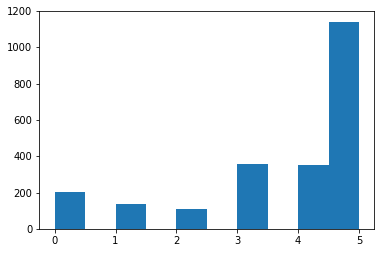

In [118]:
# GradientBoostingClassifier

def transform(ytrain):
    if ytrain < 20:
        return 0
    if ytrain < 40:
        return 1
    if ytrain < 60:
        return 2
    if ytrain < 80:
        return 3
    if ytrain < 100:
        return 4
    return 5


ytrainClassifier = [transform(i) for i in ytrain]
ytestClassifier = [transform(i) for i in ytest]
# ytestClassifier
# xtrain.shape,ytrain.shape
plt.hist(ytrainClassifier)

In [119]:
GBclassifier = GradientBoostingClassifier().fit(xtrain,ytrainClassifier)

yhatClassifier = GBclassifier.predict(xtrain)
yhatClassifier

array([5, 0, 1, ..., 0, 5, 5])

(array([ 47.,   0.,  14.,   0.,   8.,   0.,  36.,   0.,  38., 430.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

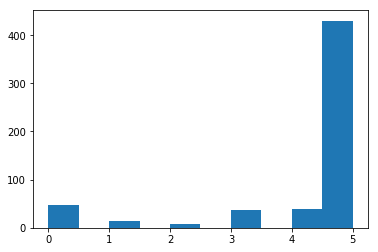

In [120]:
yhatClassifier = GBclassifier.predict(xtest)
accuracy_score(ytestClassifier, yhatClassifier)
plt.hist(yhatClassifier)

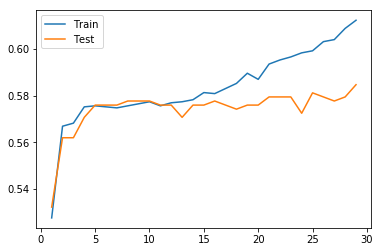

In [121]:
n_estimators = []
train_err = []
test_err = []

for n_estimator in range(1,30): #[1,2,3,4,5,10,20,50]:
    GBclassifier = GradientBoostingClassifier(n_estimators=n_estimator).fit(xtrain,ytrainClassifier)
    yhatClassifier = GBclassifier.predict(xtrain)
    n_estimators.append(n_estimator)
    train_err.append(accuracy_score(ytrainClassifier, yhatClassifier))
    test_err.append(accuracy_score(ytestClassifier, GBclassifier.predict(xtest)))
    
plt.plot(n_estimators, train_err, label="Train")
plt.plot(n_estimators, test_err, label="Test")
plt.legend()

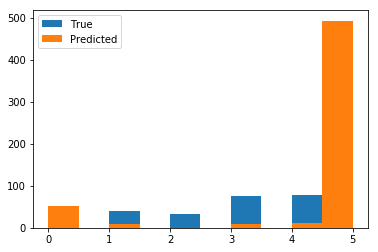

In [122]:
GBclassifier = GradientBoostingClassifier(n_estimators=20).fit(xtrain,ytrainClassifier)
plt.hist(ytestClassifier, label="True")
plt.hist(GBclassifier.predict(xtest), label="Predicted")
plt.legend()

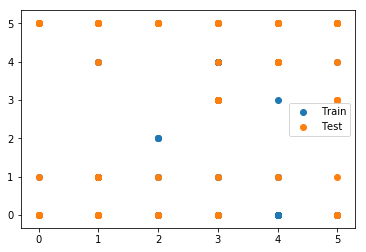

In [123]:
plt.scatter(ytrainClassifier, GBclassifier.predict(xtrain), label="Train")
plt.scatter(ytestClassifier, GBclassifier.predict(xtest), label="Test")
plt.legend()

In [124]:
# GradientBoostingRegressor

In [125]:
GBregressor = GradientBoostingRegressor().fit(xtrain,ytrain)
yhatRegressor = GBregressor.predict(xtrain)
yhatRegressor

array([95.59680121, 33.91124161, 58.79016065, ..., 24.75882454,
       83.2194297 , 78.06855175])

In [126]:
yhatRegressor = GBregressor.predict(xtest)
mean_squared_error(ytest, yhatRegressor)

598.0452434708076

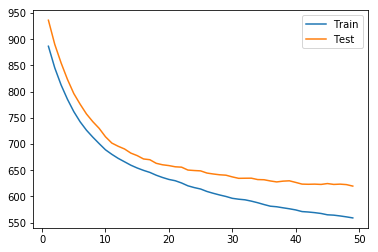

In [127]:
n_estimators = []
train_err = []
test_err = []

for n_estimator in range(1,50): #[1,2,3,4,5,10,20,50]:
    GBregressor = GradientBoostingRegressor(n_estimators=n_estimator).fit(xtrain,ytrain)
    yhatRegressor = GBregressor.predict(xtrain)
    n_estimators.append(n_estimator)
    train_err.append(mean_squared_error(ytrain, yhatRegressor))
    test_err.append(mean_squared_error(ytest, GBregressor.predict(xtest)))
    
plt.plot(n_estimators, train_err, label="Train")
plt.plot(n_estimators, test_err, label="Test")
plt.legend()

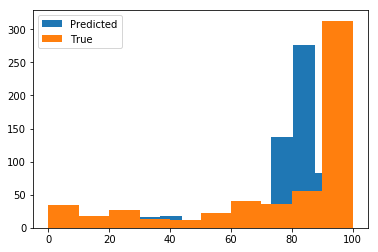

In [128]:
GBregressor = GradientBoostingRegressor(n_estimators=30).fit(xtrain,ytrain)
plt.hist(GBregressor.predict(xtest), label="Predicted")
plt.hist(ytest, label="True")
plt.legend()

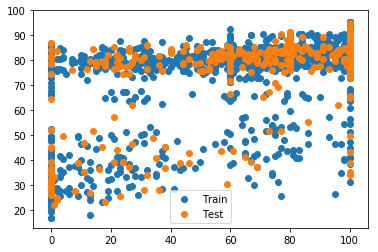

In [129]:
plt.scatter(ytrain, GBregressor.predict(xtrain), label="Train")
plt.scatter(ytest, GBregressor.predict(xtest), label="Test")
plt.legend()

In [130]:
# We finally look at 2 different Advanced Models that helps us visualize the data
# SVR
# MLPRegressor
# Before we begin with these Models, we need to format the data in a manner in which we can work with

In [131]:
# Imputer and formatting data
# Before we begin with these Models, we need to format the data in a manner in which we can work with, but this time, is a smarter manner using an Imputer to populate missing values for us
# xmissing = dfclean[['jailprison' ,'Total number of calls',
# 'Total duration of calls',
# 'Total incoming calls',
# 'Total outgoing calls',
# 'Total number of missed calls',
# 'Total number of incoming calls, excluding missed',
# 'Proportion of incoming calls answered',
# 'Proportion of calls incoming',
# 'Duration of incoming calls',
# 'Duration of outgoing calls',
# 'Total number of night calls',
# 'Any night call',
# 'Number of incoming calls at night',
# 'Number of outgoing calls at night',
# 'Any night incoming call',
# 'Any night outgoing call',
# 'Min days between calls',
# 'Max days between calls',
# 'Total number of texts',
# 'Any night text',
# 'Number of texts at night',
# 'Min days between texts',
# 'Max days between texts']].values

all_cols = set(dfcleanX.columns.values)
all_cols = all_cols.difference(['Contact.ID', 'close', 'baseline_flag', 'subjectid', 'cat', 'empstatus', 'svy_contact'])
xmissing = dfcleanX[[i for i in all_cols]].values

# dfRawFilled = pandas.DataFrame(data=xdata)
imp = Imputer()
xdataimputed = imp.fit_transform(xmissing)
# imp.transform(dfRawFilled.values)
# dfRawFilled = pandas.DataFrame(data=(imp.transform(dfRawFilled.values)))
# dfRawFilled
xdataimputed

array([[2.000e+00, 1.190e+02, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        1.000e+00],
       [2.000e+00, 2.580e+02, 0.000e+00, ..., 0.000e+00, 2.000e+00,
        0.000e+00],
       [1.000e+00, 4.040e+02, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.000e+00, 1.240e+02, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        0.000e+00],
       [2.800e+01, 9.697e+03, 1.000e+00, ..., 0.000e+00, 2.600e+01,
        0.000e+00],
       [2.000e+00, 2.200e+01, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        0.000e+00]])

In [132]:
xdataimputed.shape

(2869, 55)

In [133]:
# We implement a random 80/20 split of the data to be used for train/test
# namimg variables that will be used for training/testing
xtrain = xdataimputed[train_indices]
xtest = xdataimputed[test_indices]

# ravel creates 1d array
y = dfclean[['close']].values.ravel()
ytrain = y[train_indices]
ytest = y[test_indices]

In [134]:
# SVR

svr = SVR(kernel='rbf', C=1e1, epsilon=0.2)
svr.fit(xtrain, ytrain)
yhatsvr = svr.predict(xtest)
yhatsvr

array([ 91.33238375,  91.34961962,  91.33238375,  91.33238375,
        91.46678109,  90.92479046,  91.33236736,  91.69864899,
        88.2406717 ,  91.33238375,  91.33156119,  91.1694871 ,
        91.312941  ,  91.33231171,  91.33238375,  91.33238375,
        91.33967524,  91.33238375,  93.20517614,  86.228072  ,
        91.33238375,  91.33238375,  91.33238375,  91.33238375,
        91.33238375,  91.33238375,  90.98330837,  91.33238375,
        91.33202996,  91.33238375,  91.33232252,  91.33238375,
        91.33238375,  91.02926212,  91.33238512,  91.33238375,
        91.32897285,  92.55515761,  91.33238375,  91.33238375,
        91.33238375,  91.33238375,  91.28551582,  91.33238375,
        87.38797979,  91.3323822 ,  91.65367332,  91.33234771,
        91.33238378,  91.33238375,  91.33229713,  91.33238375,
        91.33238375,  91.33238375,  91.33238375,  91.33238375,
        91.33237078,  91.33238375,  91.33238375,  91.33238375,
        91.33151955,  93.14998484,  92.0232188 ,  91.43

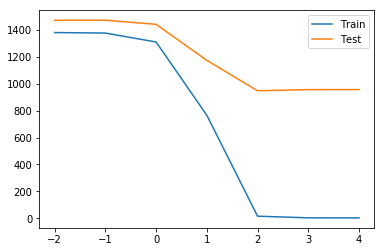

In [135]:
lCs = []
train_err = []
test_err = []

for lC in range(-2,5): #[1,2,3,4,5,10,20,50]: range(1,30)
    svr = SVR(kernel='rbf', C=pow(10,lC)).fit(xtrain,ytrain)
    lCs.append(lC)
    train_err.append(mean_squared_error(ytrain, svr.predict(xtrain)))
    test_err.append(mean_squared_error(ytest, svr.predict(xtest)))
    
plt.plot(lCs, train_err, label="Train")
plt.plot(lCs, test_err, label="Test")
plt.legend()

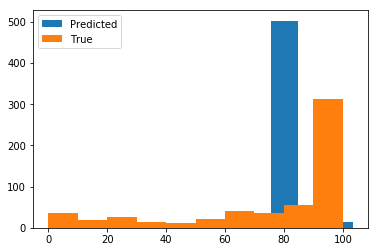

In [136]:
svr = SVR(kernel='rbf', C=1e2).fit(xtrain,ytrain)
plt.hist(svr.predict(xtest), label="Predicted")
plt.hist(ytest, label="True")
plt.legend()

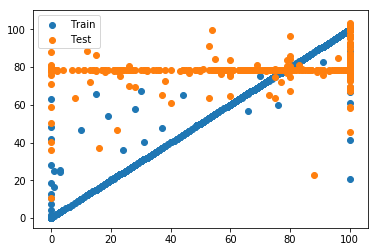

In [137]:
plt.scatter(ytrain, svr.predict(xtrain), label="Train")
plt.scatter(ytest, svr.predict(xtest), label="Test")
plt.legend()

In [138]:
# MLPRegressor
mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(5,2))
mlp.fit(xtrain, ytrain)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [139]:
yhat = mlp.predict(xtest)
mean_squared_error(ytest, mlp.predict(xtest))

1465.418816031803

(array([ 62., 199., 162., 115.,  24.,   8.,   0.,   1.,   1.,   1.]),
 array([ 35.31515048,  51.07851477,  66.84187905,  82.60524333,
         98.36860762, 114.1319719 , 129.89533618, 145.65870047,
        161.42206475, 177.18542903, 192.94879332]),
 <a list of 10 Patch objects>)

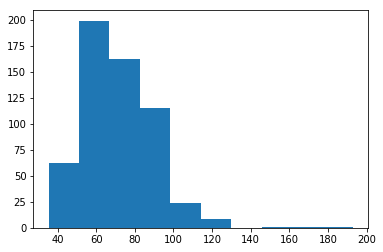

In [140]:
plt.hist(yhat)

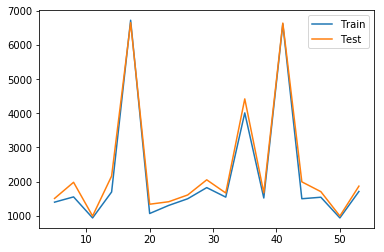

In [141]:
hs = []
train_err = []
test_err = []

for h in range(5,55,3): #[1,2,3,4,5,10,20,50]: range(1,30)
    mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(h,5))
    mlp.fit(xtrain, ytrain)
    hs.append(h)
    train_err.append(mean_squared_error(ytrain, mlp.predict(xtrain)))
    test_err.append(mean_squared_error(ytest, mlp.predict(xtest)))
    
plt.plot(hs, train_err, label="Train")
plt.plot(hs, test_err, label="Test")
plt.legend()

In [143]:
# We filter out the specific columns we are interested in

# xdatafull = raw_data[['jailprison' ,'Total number of calls',
# 'Total duration of calls',
# 'Total incoming calls',
# 'Total outgoing calls',
# 'Total number of missed calls',
# 'Total number of incoming calls, excluding missed',
# 'Proportion of incoming calls answered',
# 'Proportion of calls incoming',
# 'Duration of incoming calls',
# 'Duration of outgoing calls',
# 'Total number of night calls',
# 'Any night call',
# 'Number of incoming calls at night',
# 'Number of outgoing calls at night',
# 'Any night incoming call',
# 'Any night outgoing call',
# 'Min days between calls',
# 'Max days between calls',
# 'Total number of texts',
# 'Any night text',
# 'Number of texts at night',
# 'Min days between texts',
# 'Max days between texts']].values

all_cols = set(updated_raw_data_original.columns.values)
all_cols = all_cols.difference(['Contact.ID', 'close', 'baseline_flag', 'subjectid', 'cat', 'empstatus', 'svy_contact'])
xdatafull = dfcleanX[[i for i in all_cols]].values

KeyError: "['scale'] not in index"

In [98]:
dfRawFilledFull = pandas.DataFrame(data=xdatafull)
print(dfRawFilledFull)

        0        1    2     3        4     5    6         7     8    9  ...   \
0      2.0    119.0  1.0   0.0    261.0   4.0  0.0  0.666667   1.0  1.0 ...    
1      2.0    258.0  0.0   0.0    258.0   0.0  0.0  0.000000   1.0  1.0 ...    
2      1.0    404.0  0.0   0.0    482.0   1.0  0.0  1.000000   0.0  0.0 ...    
3     66.0  12343.0  0.0  14.0  34107.0  93.0  1.0  0.830189  17.0  1.0 ...    
4      2.0      0.0  0.0   2.0     85.0   1.0  1.0  0.666667   0.0  0.0 ...    
5      1.0    200.0  1.0   0.0    200.0   0.0  0.0  0.000000   0.0  0.0 ...    
6      2.0    309.0  0.0   0.0    651.0   6.0  0.0  0.500000   1.0  1.0 ...    
7      3.0    583.0  0.0   0.0   1057.0   5.0  0.0  0.750000   0.0  0.0 ...    
8     10.0   1197.0  0.0   3.0  10492.0  28.0  0.0  0.526316   7.0  1.0 ...    
9     25.0   5483.0  1.0   9.0  11237.0  22.0  0.0  0.936170  13.0  1.0 ...    
10     2.0    757.0  1.0   0.0    805.0   3.0  0.0  0.800000   0.0  0.0 ...    
11    14.0    454.0  1.0   4.0   1511.0 

In [93]:
imp = Imputer()
imp.fit(dfRawFilledFull)
imp.transform(dfRawFilledFull.values)
dfRawFilledFull = pandas.DataFrame(data=(imp.transform(dfRawFilledFull.values)))
dfRawFilledFull

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2.0,119.0,1.0,0.0,261.0,4.0,0.000000,0.666667,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.333333,4.0,1.0,2.0,1.0
1,2.0,258.0,0.0,0.0,258.0,0.0,0.000000,0.000000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,2.0,0.0
2,1.0,404.0,0.0,0.0,482.0,1.0,0.000000,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.0,1.0,0.0
3,66.0,12343.0,0.0,14.0,34107.0,93.0,1.000000,0.830189,17.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.415094,24.0,0.0,52.0,0.0
4,2.0,0.0,0.0,2.0,85.0,1.0,1.000000,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.0
5,1.0,200.0,1.0,0.0,200.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0
6,2.0,309.0,0.0,0.0,651.0,6.0,0.000000,0.500000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.250000,4.0,0.0,2.0,0.0
7,3.0,583.0,0.0,0.0,1057.0,5.0,0.000000,0.750000,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,0.375000,2.0,0.0,3.0,0.0
8,10.0,1197.0,0.0,3.0,10492.0,28.0,0.000000,0.526316,7.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.263158,21.0,0.0,7.0,0.0
9,25.0,5483.0,1.0,9.0,11237.0,22.0,0.000000,0.936170,13.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.531915,10.0,0.0,16.0,0.0


In [94]:
# update x to use values that have been populated now
#xdatafullColumns = dfRawFilledFull[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values


In [95]:
# num_of_cols = dfRawFilledFull.columns.size
# num_of_cols_array = []
# for i in range(num_of_cols):
#     num_of_cols_array.append(i)
    
# print(num_of_cols_array)


# update x to use values that have been populated now
xdatafullColumns = dfRawFilledFull[[i for i in range(dfRawFilledFull.columns.size)]].values

In [96]:
# debugging
xdatafullColumns.shape

(2869, 55)

In [62]:
GBregressor = GradientBoostingRegressor().fit(xtrain,ytrain)
yhatRegressor = GBregressor.predict(xdatafullColumns)
print(yhatRegressor.shape)
print(updated_raw_data.shape)
# Do one last final predict on best results and feed out 
updated_raw_data['Predicted Closeness'] = yhatRegressor
print(updated_raw_data.shape)

(2869,)
(18265, 62)


ValueError: Length of values does not match length of index

In [ ]:
# Finally we write out the new dataFrame with the "Predicted Closeness" column

dfPredictions = raw_data.to_csv('Updated_Closeness_Predictions.csv', encoding="utf-8")